In [2]:
import pandas as pd

train = pd.read_parquet('/kaggle/input/transformer-autoencoder-dataset/train.parquet')
test = pd.read_parquet('/kaggle/input/transformer-autoencoder-dataset/test.parquet')

In [3]:
all_columns = train.columns.tolist()
new_columns = ['y'] + [f'x{i+1}' for i in range(len(all_columns)-1)]
train.columns = new_columns

In [4]:
all_columns = test.columns.tolist()
new_columns = ['y'] + [f'x{i+1}' for i in range(len(all_columns)-1)]
test.columns = new_columns

In [5]:
train.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21
0,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,1.271015,2.214872,0.499994,-1.261432,0.732156,0.000000,0.398701,-1.138930,-0.000819,0.000000
1,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,-0.819690,2.214872,0.993490,0.356080,-0.208778,2.548224,1.256955,1.128848,0.900461,0.000000
2,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,0.736159,2.214872,1.298720,-1.430738,-0.364658,0.000000,0.745313,-0.678379,-1.360356,0.000000
3,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,0.971407,2.214872,0.596761,-0.350273,0.631194,0.000000,0.479999,-0.373566,0.113041,0.000000
4,0.0,1.595839,-0.607811,0.007075,1.818450,-0.111906,0.847550,-0.566437,1.581239,2.173076,...,1.426367,0.000000,0.921661,-1.190432,-1.615589,0.000000,0.651114,-0.654227,-1.274345,3.101961


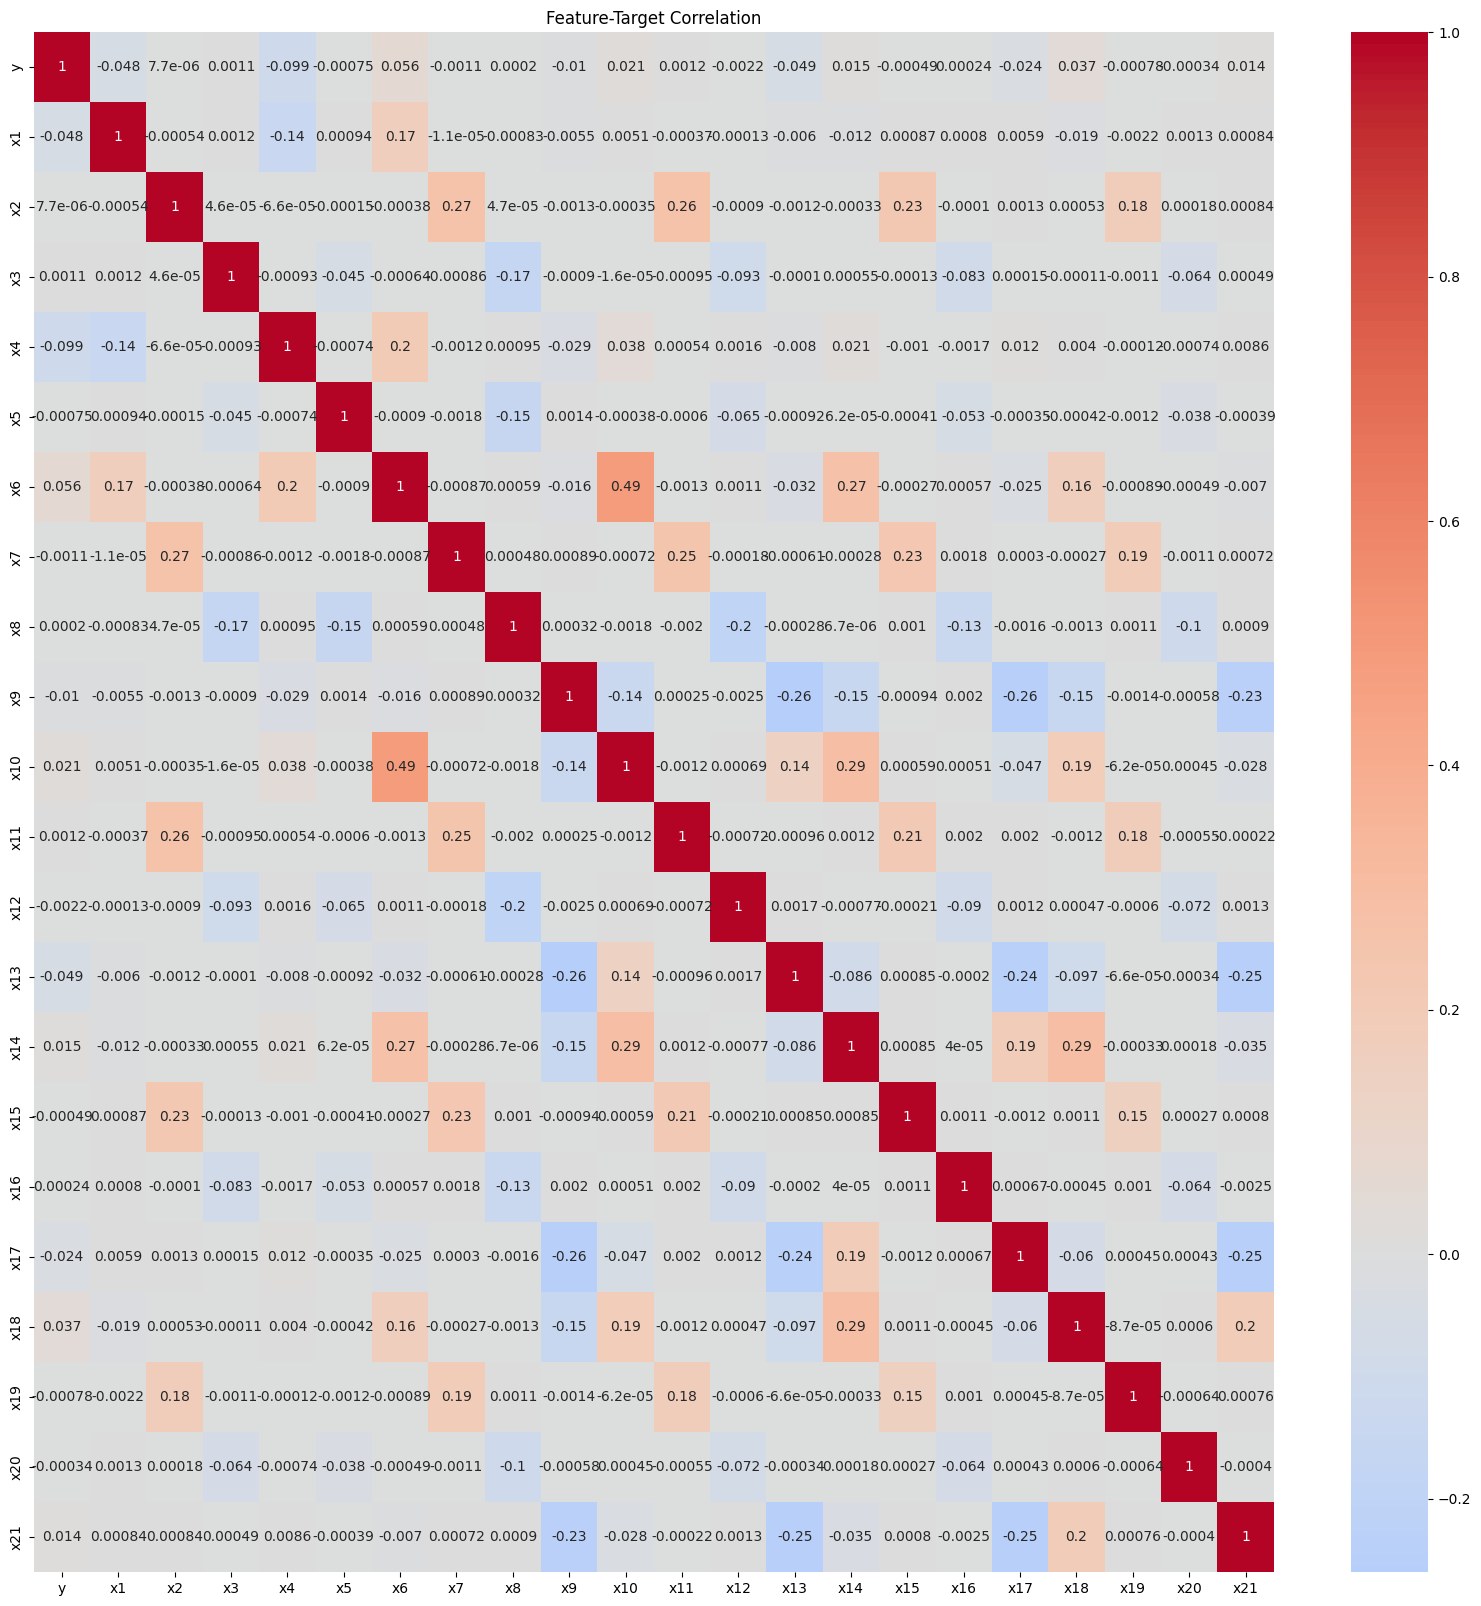

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlations
corr_matrix = train.corr(method='pearson')  # or 'spearman'
target_corr = corr_matrix['y'].sort_values(ascending=False)

# Plot
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Feature-Target Correlation")
plt.show()

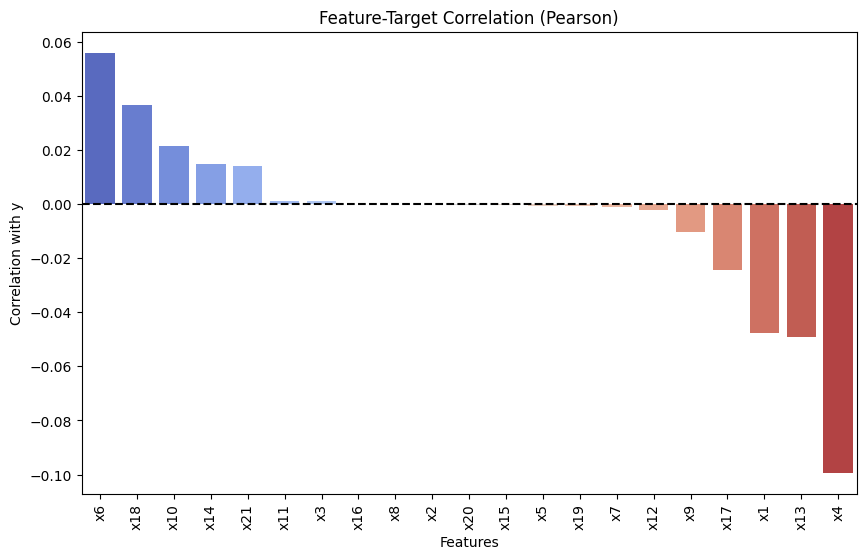

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'train' with columns x1-x20 and y
# Calculate correlations with target
target_corr = train.corr(method='pearson')['y'].sort_values(ascending=False)

# Drop 'y' (to avoid self-correlation)
target_corr = target_corr.drop('y', errors='ignore')

# Plot (bar plot for clarity)
plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr.index, y=target_corr.values, palette='coolwarm')
plt.axhline(0, color='black', linestyle='--')  # Add zero line
plt.title("Feature-Target Correlation (Pearson)")
plt.xlabel("Features")
plt.ylabel("Correlation with y")
plt.xticks(rotation=90)
plt.show()

# There is a good relation between x14, x6, x13, x1, x18, x17, x10, x14, x21, x9 (in decreasing)and the target.

In [8]:
train.describe()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21
count,1.100000e+06,1.100000e+06,1.100000e+06,1.100000e+06,1.100000e+06,1.100000e+06,1.100000e+06,1.100000e+06,1.100000e+06,1.100000e+06,...,1.100000e+06,1.100000e+06,1.100000e+06,1.100000e+06,1.100000e+06,1.100000e+06,1.100000e+06,1.100000e+06,1.100000e+06,1.100000e+06
mean,5.295173e-01,9.913835e-01,9.536004e-04,-7.374538e-04,9.981472e-01,-7.672762e-04,9.906851e-01,-7.506974e-04,5.101967e-04,1.000775e+00,...,2.217892e-04,1.000496e+00,9.924057e-01,2.098324e-03,6.868487e-05,9.992596e-01,9.860794e-01,-7.943798e-04,-1.301046e-03,9.980434e-01
std,4.991282e-01,5.649400e-01,1.008487e+00,1.005848e+00,5.991567e-01,1.006687e+00,4.751833e-01,1.010139e+00,1.006215e+00,1.027788e+00,...,1.006862e+00,1.049272e+00,4.867730e-01,1.008249e+00,1.005804e+00,1.193635e+00,5.057663e-01,1.007892e+00,1.005938e+00,1.399439e+00
min,0.000000e+00,2.746966e-01,-2.434976e+00,-1.742508e+00,6.259872e-04,-1.743944e+00,1.386017e-01,-2.969725e+00,-1.741237e+00,0.000000e+00,...,-1.742372e+00,0.000000e+00,2.636076e-01,-2.729663e+00,-1.742069e+00,0.000000e+00,3.653542e-01,-2.497265e+00,-1.742691e+00,0.000000e+00
25%,0.000000e+00,5.907533e-01,-7.363746e-01,-8.719308e-01,5.762654e-01,-8.717909e-01,6.788095e-01,-6.882352e-01,-8.680962e-01,0.000000e+00,...,-8.707339e-01,0.000000e+00,6.512039e-01,-6.970776e-01,-8.711343e-01,0.000000e+00,6.175240e-01,-7.150230e-01,-8.720338e-01,0.000000e+00
50%,1.000000e+00,8.535544e-01,9.198132e-04,9.714414e-04,8.915848e-01,-1.158754e-03,8.942697e-01,-1.015666e-03,7.152493e-04,1.086538e+00,...,3.514990e-04,0.000000e+00,8.977762e-01,2.903640e-03,-7.519117e-04,0.000000e+00,8.679899e-01,-4.606903e-04,-4.703478e-03,0.000000e+00
75%,1.000000e+00,1.236592e+00,7.391881e-01,8.693294e-01,1.293202e+00,8.711392e-01,1.170740e+00,6.871941e-01,8.694214e-01,2.173076e+00,...,8.715371e-01,2.214872e+00,1.222500e+00,7.019747e-01,8.708400e-01,2.548224e+00,1.222147e+00,7.141017e-01,8.699407e-01,3.101961e+00
max,1.000000e+00,8.711782e+00,2.434868e+00,1.743236e+00,9.900929e+00,1.743257e+00,8.382610e+00,2.969674e+00,1.741454e+00,2.173076e+00,...,1.743175e+00,2.214872e+00,8.864838e+00,2.730009e+00,1.742884e+00,2.548224e+00,1.162123e+01,2.498009e+00,1.743372e+00,3.101961e+00


In [9]:
train.isna().sum()

y      0
x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
x20    0
x21    0
dtype: int64

In [ ]:
import pandas as pd

def count_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return len(outliers)

# Assuming train_df and test_df are your DataFrames
features = [f'x{i}' for i in range(1, 22)]  # x1 to x21

print("=== Train Set Outliers ===")
for feature in features:
    print(f"{feature}: {count_outliers(train, feature)} outliers")

print("\n=== Test Set Outliers ===")
for feature in features:
    print(f"{feature}: {count_outliers(test, feature)} outliers")

In [12]:
def replace_outliers_with_min_max(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find non-outliers to compute min and max
    non_outliers = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    min_val = non_outliers[feature].min()
    max_val = non_outliers[feature].max()
    
    # Replace outliers
    df[feature] = df[feature].apply(
        lambda x: min_val if x < lower_bound else (max_val if x > upper_bound else x)
    )
    return df

# Assuming train_df and test_df are your DataFrames
features = [f'x{i}' for i in range(1, 22)]  # x1 to x21

# Apply to Train and Test sets
for feature in features:
    train_df = replace_outliers_with_min_max(tra, feature)
    test_df = replace_outliers_with_min_max(test_df, feature)

print("Outliers replaced with min/max bounds in train_df and test_df.")

Outliers replaced with min/max bounds in train_df and test_df.


=== Autoencoder Training ===


Autoencoder Training:   0%|          | 0/20 [00:00<?, ?it/s]


=== Anomaly Detection ===

Visualizing latent space...


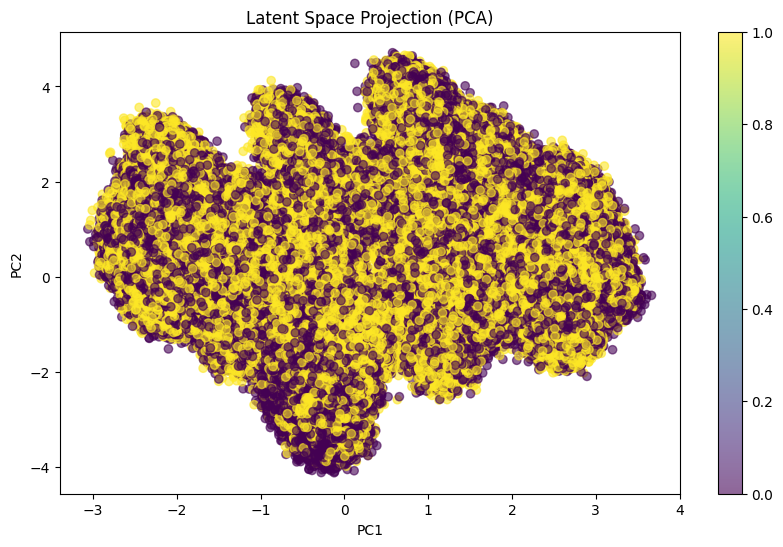

Running Isolation Forest anomaly detection...

Detected 55000 outliers (5.00% of data)


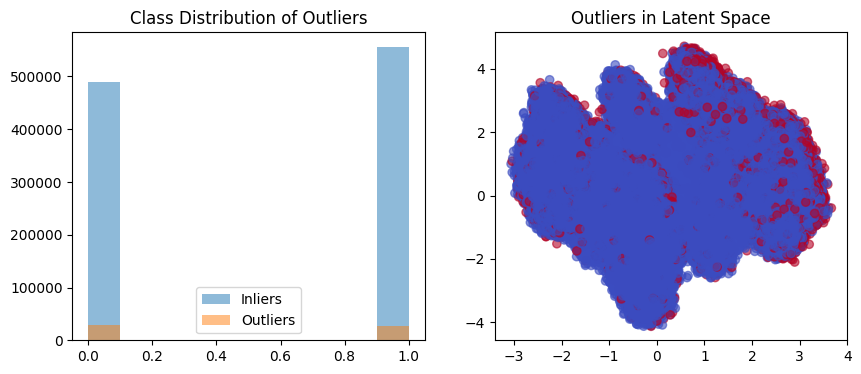

Proceed with removing 55000 outliers? (y/n):  y



Filtering out outliers...
New training set size: 1045000 samples

=== Classifier Training ===

Epoch  Train Acc  Val Acc  Val AUC   LR
----------------------------------------
    1  0.5902    0.6372   0.6887  0.001000
    2  0.6452    0.6645   0.7258  0.001000
    3  0.6652    0.6753   0.7405  0.001000
    4  0.6767    0.6829   0.7510  0.000500
    5  0.6809    0.6862   0.7542  0.000500
    6  0.6851    0.6888   0.7577  0.000250
    7  0.6868    0.6906   0.7602  0.000250
    8  0.6878    0.6925   0.7608  0.000250
    9  0.6894    0.6934   0.7621  0.000250
   10  0.6902    0.6945   0.7633  0.000250
   11  0.6912    0.6957   0.7645  0.000250


KeyboardInterrupt: 

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from tqdm.auto import tqdm
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from torch.optim.lr_scheduler import ReduceLROnPlateau
import numpy as np
import warnings
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from scipy import stats

# Suppress warnings
warnings.filterwarnings("ignore")

# Create models directory if it doesn't exist
os.makedirs('models', exist_ok=True)

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1. Model Definitions ------------------------------------------------------
class TransformerAutoencoder(nn.Module):
    def __init__(self, input_dim=21, d_model=64, num_heads=4, num_layers=2, 
                 d_ff=256, dropout=0.1):
        super().__init__()
        self.encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(
                d_model=d_model,
                nhead=num_heads,
                dim_feedforward=d_ff,
                dropout=dropout,
                batch_first=True
            ),
            num_layers=num_layers
        )
        self.input_proj = nn.Linear(input_dim, d_model)
        self.decoder = nn.Sequential(
            nn.Linear(d_model, d_ff),
            nn.ReLU(),
            nn.Linear(d_ff, input_dim)
        )
        
    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.input_proj(x)
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded.squeeze(1)

class BinaryClassifier(nn.Module):
    def __init__(self, input_size=42, hidden_size=128, dropout=0.1):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_size, hidden_size//2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_size//2, 1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        return self.net(x).squeeze()

class FullModel(nn.Module):
    def __init__(self, tae, classifier):
        super().__init__()
        self.tae = tae
        self.classifier = classifier
        
    def forward(self, x):
        recon = self.tae(x)
        combined = torch.cat([x, recon], dim=1)
        return self.classifier(combined)

# 2. Training Utilities -----------------------------------------------------
def save_model(model, model_type, epoch, metric):
    """Save model with metrics in filename"""
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"models/best_{model_type}_epoch{epoch}_{metric:.4f}_{timestamp}.pth"
    torch.save(model.state_dict(), filename)
    return filename

def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

def evaluate_model(model, loader):
    model.eval()
    all_preds = []
    all_preds_binary = []
    all_labels = []
    
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            preds = (outputs > 0.5).float()
            all_preds.extend(outputs.cpu().numpy())
            all_preds_binary.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    acc = accuracy_score(all_labels, all_preds_binary)
    auc = roc_auc_score(all_labels, all_preds)
    return acc, auc, all_labels, all_preds_binary

def visualize_latent_space(model, data_loader):
    """Visualize latent space projections"""
    model.eval()
    latents = []
    labels = []
    
    with torch.no_grad():
        for inputs, lbls in data_loader:
            inputs = inputs.to(device)
            x = inputs.unsqueeze(1)
            x = model.tae.input_proj(x)
            encoded = model.tae.encoder(x)
            latents.append(encoded.mean(dim=1).cpu().numpy())
            labels.append(lbls.cpu().numpy())
    
    latents = np.concatenate(latents)
    labels = np.concatenate(labels)
    
    # PCA projection to 2D
    pca = PCA(n_components=2)
    projected = pca.fit_transform(latents)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(projected[:, 0], projected[:, 1], c=labels, alpha=0.6, cmap='viridis')
    plt.colorbar()
    plt.title("Latent Space Projection (PCA)")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()
    return latents, labels

def detect_and_remove_outliers(model, data_loader, threshold=2.5):
    """Improved anomaly detection using robust methods"""
    model.eval()
    
    # First visualize the latent space
    print("\nVisualizing latent space...")
    latents, labels = visualize_latent_space(model, data_loader)
    
    # 1. Try Isolation Forest
    print("Running Isolation Forest anomaly detection...")
    clf = IsolationForest(contamination=0.05, random_state=42)
    is_inlier = clf.fit_predict(latents)
    is_outlier = is_inlier == -1
    outlier_count = np.sum(is_outlier)
    
    # 2. Fallback to Z-score if too many outliers detected
    if outlier_count > 0.5 * len(latents):
        print("Isolation Forest detected too many outliers, switching to Z-score method")
        z_scores = np.abs(stats.zscore(latents, axis=0))
        is_outlier = np.any(z_scores > threshold, axis=1)
        outlier_count = np.sum(is_outlier)
    
    print(f"\nDetected {outlier_count} outliers ({(outlier_count/len(latents))*100:.2f}% of data)")
    
    # Show outlier distribution
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.hist(labels[~is_outlier], alpha=0.5, label='Inliers')
    plt.hist(labels[is_outlier], alpha=0.5, label='Outliers')
    plt.title("Class Distribution of Outliers")
    plt.legend()
    
    plt.subplot(1, 2, 2)
    pca = PCA(n_components=2).fit_transform(latents)
    plt.scatter(pca[:, 0], pca[:, 1], c=is_outlier, alpha=0.6, cmap='coolwarm')
    plt.title("Outliers in Latent Space")
    plt.show()
    
    # Get user confirmation
    response = input(f"Proceed with removing {outlier_count} outliers? (y/n): ")
    if response.lower() != 'y':
        print("Skipping outlier removal")
        return [(b,i) for b in range(len(data_loader)) 
                for i in range(data_loader.batch_size)], 0
    
    # Get indices of normal samples
    all_indices = [(b,i) for b in range(len(data_loader)) 
                  for i in range(data_loader.batch_size)]
    normal_indices = [idx for idx, outlier in zip(all_indices, is_outlier) if not outlier]
    
    return normal_indices, outlier_count

def filter_data_loader(data_loader, normal_indices):
    """Filter DataLoader to only include non-outlier samples"""
    # Group indices by batch
    batch_dict = {}
    for batch_idx, sample_idx in normal_indices:
        if batch_idx not in batch_dict:
            batch_dict[batch_idx] = []
        batch_dict[batch_idx].append(sample_idx)
    
    # Extract normal samples from each batch
    normal_samples = []
    for batch_idx, (inputs, labels) in enumerate(data_loader):
        if batch_idx in batch_dict:
            sample_indices = batch_dict[batch_idx]
            normal_samples.append((
                inputs[sample_indices],
                labels[sample_indices]
            ))
    
    # Create new dataset
    if normal_samples:
        filtered_inputs = torch.cat([x[0] for x in normal_samples])
        filtered_labels = torch.cat([x[1] for x in normal_samples])
        filtered_dataset = TensorDataset(filtered_inputs, filtered_labels)
        return DataLoader(filtered_dataset, batch_size=data_loader.batch_size, shuffle=True)
    return data_loader

def train_autoencoder(model, train_loader, test_loader, optimizer, scheduler, epochs, patience=5):
    model.train()
    criterion = nn.MSELoss()
    best_loss = float('inf')
    history = []
    no_improve = 0
    
    epoch_pbar = tqdm(range(epochs), desc="Autoencoder Training", leave=True)
    for epoch in epoch_pbar:
        model.train()
        running_loss = 0.0
        for inputs, _ in train_loader:
            inputs = inputs.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, inputs)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        train_loss = running_loss/len(train_loader)
        
        # Evaluation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, _ in test_loader:
                inputs = inputs.to(device)
                outputs = model(inputs)
                val_loss += criterion(outputs, inputs).item()
        
        val_loss /= len(test_loader)
        current_lr = optimizer.param_groups[0]['lr']
        scheduler.step(val_loss)
        
        # Save best model
        if val_loss < best_loss:
            best_loss = val_loss
            ae_path = save_model(model, "autoencoder", epoch+1, val_loss)
            no_improve = 0
        else:
            no_improve += 1
        
        epoch_pbar.set_postfix(val_loss=f"{val_loss:.4f}", lr=f"{current_lr:.6f}")
        
        if no_improve >= patience:
            tqdm.write(f"Early stopping at epoch {epoch+1}")
            break
    
    return history, ae_path

def train_classifier(model, train_loader, test_loader, optimizer, scheduler, epochs, patience=5):
    model.train()
    criterion = nn.BCELoss()
    best_auc = 0.0
    history = []
    no_improve = 0
    
    print("\nEpoch  Train Acc  Val Acc  Val AUC   LR")
    print("----------------------------------------")
    
    for epoch in range(epochs):
        model.train()
        correct = 0
        total = 0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            preds = (outputs > 0.5).float()
            correct += (preds == labels).sum().item()
            total += labels.size(0)
        
        train_acc = correct/total
        
        # Evaluation
        val_acc, val_auc, val_labels, val_preds = evaluate_model(model, test_loader)
        current_lr = optimizer.param_groups[0]['lr']
        scheduler.step(1-val_auc)
        
        # Save best model
        if val_auc > best_auc:
            best_auc = val_auc
            clf_path = save_model(model, "classifier", epoch+1, val_auc)
            no_improve = 0
        else:
            no_improve += 1
        
        print(f"{epoch+1:5d}  {train_acc:.4f}    {val_acc:.4f}   {val_auc:.4f}  {current_lr:.6f}")
        
        if no_improve >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break
    
    # Final confusion matrix
    print("\nFinal Validation Metrics:")
    _, _, val_labels, val_preds = evaluate_model(model, test_loader)
    plot_confusion_matrix(val_labels, val_preds)
    
    return history, clf_path

# 3. Main Pipeline ----------------------------------------------------------
def prepare_data(train_df, test_df, target_col):
    """Prepare data loaders with 8192 batch size"""
    X_train = train_df.drop(columns=[target_col]).values
    y_train = train_df[target_col].values
    X_test = test_df.drop(columns=[target_col]).values
    y_test = test_df[target_col].values
    
    X_train = torch.tensor(X_train, dtype=torch.float32)
    y_train = torch.tensor(y_train, dtype=torch.float32)
    X_test = torch.tensor(X_test, dtype=torch.float32)
    y_test = torch.tensor(y_test, dtype=torch.float32)
    
    train_dataset = TensorDataset(X_train, y_train)
    test_dataset = TensorDataset(X_test, y_test)
    
    BATCH_SIZE = 8192
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)
    
    return train_loader, test_loader

def run_pipeline(train_df, test_df, target_col, ae_patience=5, clf_patience=5):
    # Prepare data
    train_loader, test_loader = prepare_data(train_df, test_df, target_col)
    
    # Initialize models
    tae = TransformerAutoencoder().to(device)
    classifier = BinaryClassifier().to(device)
    full_model = FullModel(tae, classifier).to(device)
    
    # 1. Train Autoencoder
    print("=== Autoencoder Training ===")
    ae_optimizer = optim.Adam(tae.parameters(), lr=0.001)
    ae_scheduler = ReduceLROnPlateau(
        ae_optimizer, 
        mode='min', 
        patience=1, 
        factor=0.5,
        min_lr=0.00025,
        verbose=True
    )
    ae_history, ae_path = train_autoencoder(tae, train_loader, test_loader, 
                                          ae_optimizer, ae_scheduler, 
                                          epochs=20, patience=ae_patience)
    
    # 2. Anomaly Detection and Removal
    print("\n=== Anomaly Detection ===")
    normal_indices, outlier_count = detect_and_remove_outliers(full_model, train_loader)
    
    if outlier_count > 0:
        print("\nFiltering out outliers...")
        train_loader = filter_data_loader(train_loader, normal_indices)
        print(f"New training set size: {len(train_loader.dataset)} samples")
    else:
        print("\nNo outliers detected, proceeding with original dataset")
    
    # 3. Train Classifier
    print("\n=== Classifier Training ===")
    class_optimizer = optim.Adam(full_model.parameters(), lr=0.001)
    class_scheduler = ReduceLROnPlateau(
        class_optimizer, 
        mode='max', 
        patience=1, 
        factor=0.5,
        min_lr=0.00025,
        verbose=True
    )
    class_history, clf_path = train_classifier(full_model, train_loader, test_loader,
                                             class_optimizer, class_scheduler,
                                             epochs=40, patience=clf_patience)
    
    # Final Evaluation
    print("\n=== Final Evaluation ===")
    test_acc, test_auc, test_labels, test_preds = evaluate_model(full_model, test_loader)
    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"Test AUC: {test_auc:.4f}")
    plot_confusion_matrix(test_labels, test_preds, title='Final Test Confusion Matrix')
    
    return {
        'model': full_model,
        'ae_history': ae_history,
        'class_history': class_history,
        'ae_path': ae_path,
        'clf_path': clf_path,
        'outlier_count': outlier_count,
        'test_metrics': {
            'accuracy': test_acc, 
            'auc': test_auc,
            'true_labels': test_labels,
            'pred_labels': test_preds
        }
    }

# Example usage:
results = run_pipeline(train, test, 'y')

In [ ]:
# Todo: anomoly detection, selected features, outliers for each feature